### aim: visualize model fluxes for GCB, CAL12 and TOM12 version (both run with ERA forcing), and compare against GCB 2022

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
# from cmocean import cm
# import cartopy as cp
# import cartopy.crs as ccrs
# import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
# from datetime import datetime
warnings.filterwarnings('ignore')
# import cartopy.feature as cfeature
# from importlib import reload
# import matplotlib.path as mpath
# import glob
# import pickle
import pandas as pd
# import seawater
# import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)


In [8]:
modref = pd.read_csv('/gpfs/home/mep22dku/scratch/ModelRuns/modelsAll.csv')


In [9]:
modref

,model,description,color,linestyle,breakdownWhere,Unnamed: 5,Unnamed: 6
0,TOM12_TJ_GEA1,era2 CAL12 | co2 DYN | clim DYN | s-u GPA4,r,-,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
1,TOM12_TJ_GEB1,era2 CAL12 | co2 STAT | clim BIAS | s-u GPB3,y,-,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
2,TOM12_TJ_GEC1,era2 CAL12 | co2 DYN | clim BIAS | s-u GPA4,b,-,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
3,TOM12_TJ_GED1,era2 CAL12 | co2 STAT | clim DYN | s-u GPB3,g,-,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
4,TOM12_TJ_GPA2,era2 | co2 DYN | clim DYN | 1749 rest.,k,:,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
5,TOM12_TJ_GPA1,era2 | co2 DYN | clim DYN | 1947 rest.,darkgray,:,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
6,TOM12_TJ_GPB0,ncep | co2 STAT | clim DYN | 1947 rest.,indigo,:,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
7,TOM12_TJ_GPB1,era2 | co2 STAT | clim DYN | 1749 rest.,mediumorchid,:,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
8,TOM12_TJ_GNB0,ncep | co2 STAT | clim DYN | 1947 rest.,pink,:,/gpfs/home/mep22dku/scratch/ModelRuns/,NaN,NaN
9,TOM12_TJ_GEA0,era2 | co2 DYN | clim DYN | s-u GPA2,r,-.,/gpfs/data/greenocean/software/runs/,NaN,NaN


In [71]:
modlist = ['TOM12_TJ_GEA1', 'TOM12_TJ_GEB1', 'TOM12_TJ_GEC1', 'TOM12_TJ_GED1', \
          'TOM12_TJ_GEA0', 'TOM12_TJ_GEB0', 'TOM12_TJ_GEC0', 'TOM12_TJ_GED0',\
          'TOM12_TJ_CGA1', 'TOM12_TJ_CGB1', 'TOM12_TJ_CGC1', 'TOM12_TJ_CGD1', ]

modlist_cal12 = ['TOM12_TJ_GEA1', 'TOM12_TJ_GEB1', 'TOM12_TJ_GEC1', 'TOM12_TJ_GED1']
modlist_tom12 = ['TOM12_TJ_GEA0', 'TOM12_TJ_GEB0', 'TOM12_TJ_GEC0', 'TOM12_TJ_GED0']

'era2 CAL12 | co2 DYN | clim DYN | s-u GPA4'

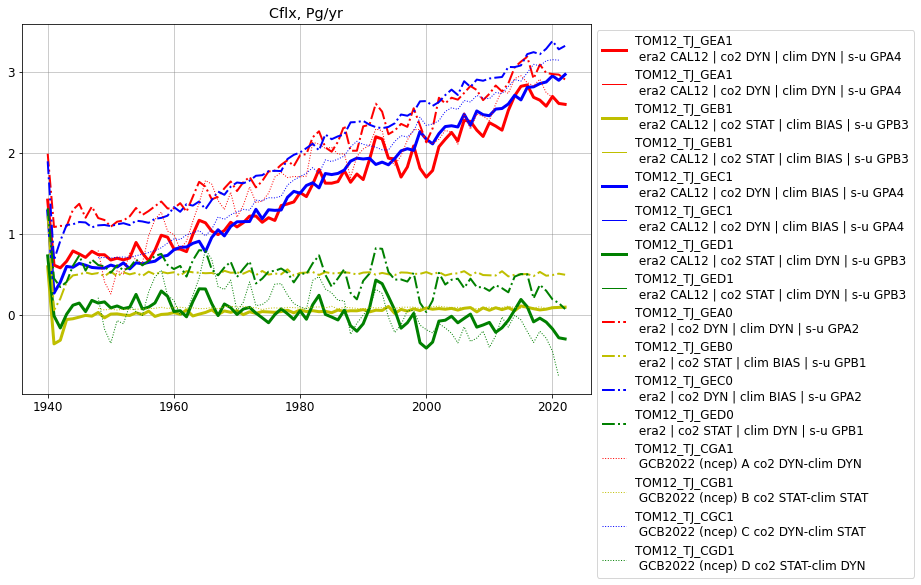

In [73]:
fact = 0.85
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()


for i in range(0,len(modlist)):
    
    tmod = modlist[i]
    tdesc = modref[modref.model == tmod].description.values[0]
    tcol = modref[modref.model == tmod].color.values[0]
    tbreak = modref[modref.model == tmod].breakdownWhere.values[0]
    tlin = modref[modref.model == tmod].linestyle.values[0]
    
    tdat = pd.read_csv(f'{tbreak}/{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    #print(tdat)
    if tmod in modlist_cal12:
        axs.plot(year,Cflx_total, color = tcol, linestyle = tlin, linewidth = 3, label = f'{tmod}\n {tdesc}' )
    if tmod in modlist_tom12:
        axs.plot(year,Cflx_total, color = tcol, linestyle = tlin, linewidth = 2, label = f'{tmod}\n {tdesc}' )

    else:
        axs.plot(year,Cflx_total, color = tcol, linestyle = tlin, linewidth = 1, label = f'{tmod}\n {tdesc}' )
plt.legend(ncol = 1, bbox_to_anchor = [1,1])
axs.set_title('Cflx, Pg/yr')
# axs.legend()

plt.grid(linestyle = '-', color = 'grey', alpha = 0.5)


In [46]:
def get_plot(tmod, tmod2):
    #could have problems if years are different lengths
    tdat = pd.read_csv(f'{tbreak}/{tmod}/breakdown.sur.annual.dat', sep='\t')
    tdat2 = pd.read_csv(f'{tbreak}/{tmod2}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    toplot = tdat.Cflx[2:].to_numpy().astype(float)
    year2 = tdat2.year[2:].to_numpy().astype(float)
    toplot2 = tdat2.Cflx[2:].to_numpy().astype(float)
    
    return year, toplot, toplot2

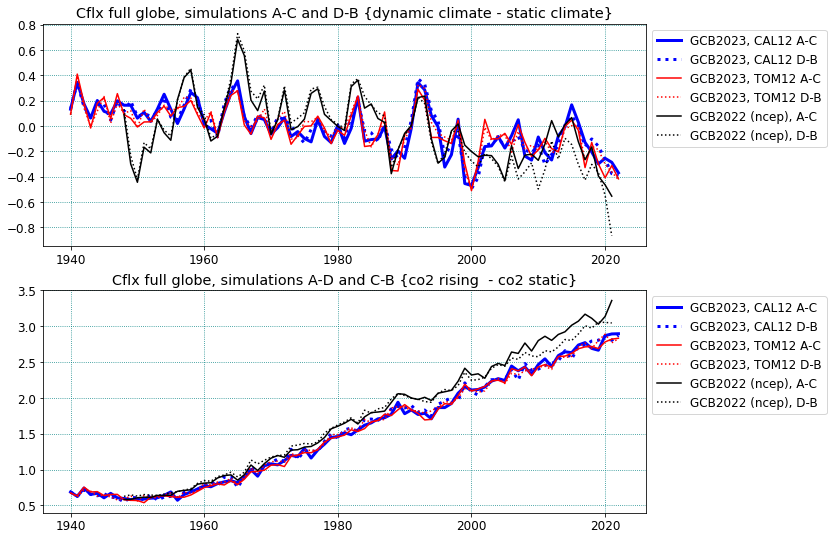

In [59]:
fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmod = 'TOM12_TJ_GEA1'; tmod2 = 'TOM12_TJ_GEC1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'b', linestyle = '-', linewidth = 3, label = 'GCB2023, CAL12 A-C')
tmod = 'TOM12_TJ_GED1'; tmod2 = 'TOM12_TJ_GEB1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'b', linestyle = ':', linewidth = 3, label = 'GCB2023, CAL12 D-B')


tmod = 'TOM12_TJ_GEA0'; tmod2 = 'TOM12_TJ_GEC0'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'r', linestyle = '-', label = 'GCB2023, TOM12 A-C')
tmod = 'TOM12_TJ_GED0'; tmod2 = 'TOM12_TJ_GEB0'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'r', linestyle = ':', label = 'GCB2023, TOM12 D-B')


tmod = 'TOM12_TJ_CGA1'; tmod2 = 'TOM12_TJ_CGC1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'k', linestyle = '-', label = 'GCB2022 (ncep), A-C')
tmod = 'TOM12_TJ_CGD1'; tmod2 = 'TOM12_TJ_CGB1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'k', linestyle = ':', label = 'GCB2022 (ncep), D-B')
axs[0].legend(bbox_to_anchor = [1,1])
tit1 = 'Cflx full globe, simulations A-C and D-B {dynamic climate - static climate}'
axs[0].set_title(tit1)

######
tmod = 'TOM12_TJ_GEA1'; tmod2 = 'TOM12_TJ_GED1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'b', linestyle = '-', linewidth = 3, label = 'GCB2023, CAL12 A-C')
tmod = 'TOM12_TJ_GEC1'; tmod2 = 'TOM12_TJ_GEB1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'b', linestyle = ':', linewidth = 3, label = 'GCB2023, CAL12 D-B')


tmod = 'TOM12_TJ_GEA0'; tmod2 = 'TOM12_TJ_GED0'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'r', linestyle = '-', label = 'GCB2023, TOM12 A-C')
tmod = 'TOM12_TJ_GEC0'; tmod2 = 'TOM12_TJ_GEB0'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'r', linestyle = ':', label = 'GCB2023, TOM12 D-B')


tmod = 'TOM12_TJ_CGA1'; tmod2 = 'TOM12_TJ_CGD1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'k', linestyle = '-', label = 'GCB2022 (ncep), A-C')
tmod = 'TOM12_TJ_CGC1'; tmod2 = 'TOM12_TJ_CGB1'
year, toplot, toplot2 = get_plot(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'k', linestyle = ':', label = 'GCB2022 (ncep), D-B')
axs[1].legend(bbox_to_anchor = [1,1])
tit1 = 'Cflx full globe, simulations A-D and C-B {co2 rising  - co2 static}'
axs[1].set_title(tit1)

axs[0].grid(linestyle = ':', color = 'teal')
axs[1].grid(linestyle = ':', color = 'teal')

In [75]:
def get_plot_so(tmod, tmod2):
    #could have problems if years are different lengths
    tdat = pd.read_csv(f'{tbreak}/{tmod}/breakdown.sur.annual.dat', sep='\t')
    tdat2 = pd.read_csv(f'{tbreak}/{tmod2}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    toplot = tdat['Cflx.7'][2:].to_numpy().astype(float) + \
    tdat['Cflx.8'][2:].to_numpy().astype(float) + \
    tdat['Cflx.9'][2:].to_numpy().astype(float)
    year2 = tdat2.year[2:].to_numpy().astype(float)
    toplot2 = tdat2['Cflx.7'][2:].to_numpy().astype(float) + \
    tdat2['Cflx.8'][2:].to_numpy().astype(float) + \
    tdat2['Cflx.9'][2:].to_numpy().astype(float)    
    return year, toplot, toplot2


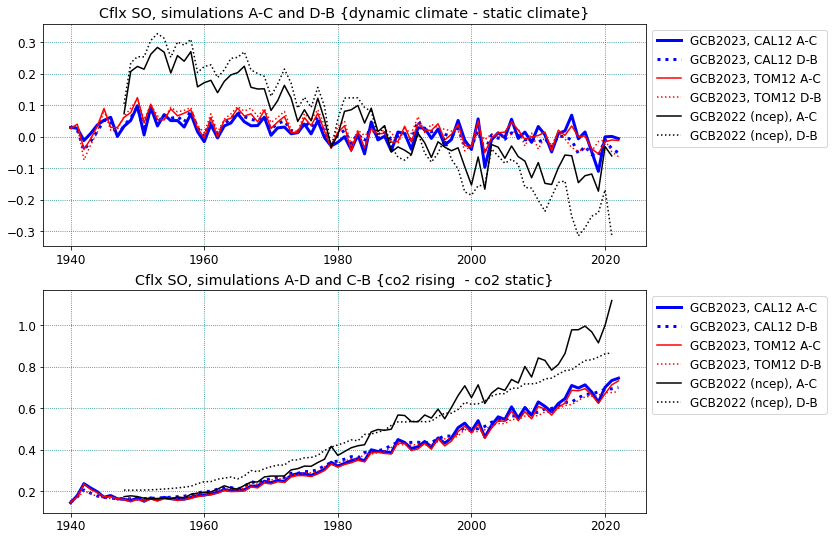

In [77]:
fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmod = 'TOM12_TJ_GEA1'; tmod2 = 'TOM12_TJ_GEC1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'b', linestyle = '-', linewidth = 3, label = 'GCB2023, CAL12 A-C')
tmod = 'TOM12_TJ_GED1'; tmod2 = 'TOM12_TJ_GEB1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'b', linestyle = ':', linewidth = 3, label = 'GCB2023, CAL12 D-B')


tmod = 'TOM12_TJ_GEA0'; tmod2 = 'TOM12_TJ_GEC0'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'r', linestyle = '-', label = 'GCB2023, TOM12 A-C')
tmod = 'TOM12_TJ_GED0'; tmod2 = 'TOM12_TJ_GEB0'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'r', linestyle = ':', label = 'GCB2023, TOM12 D-B')


tmod = 'TOM12_TJ_CGA1'; tmod2 = 'TOM12_TJ_CGC1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'k', linestyle = '-', label = 'GCB2022 (ncep), A-C')
tmod = 'TOM12_TJ_CGD1'; tmod2 = 'TOM12_TJ_CGB1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[0].plot(year, toplot-toplot2, color = 'k', linestyle = ':', label = 'GCB2022 (ncep), D-B')
axs[0].legend(bbox_to_anchor = [1,1])
tit1 = 'Cflx SO, simulations A-C and D-B {dynamic climate - static climate}'
axs[0].set_title(tit1)

######
tmod = 'TOM12_TJ_GEA1'; tmod2 = 'TOM12_TJ_GED1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'b', linestyle = '-', linewidth = 3, label = 'GCB2023, CAL12 A-C')
tmod = 'TOM12_TJ_GEC1'; tmod2 = 'TOM12_TJ_GEB1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'b', linestyle = ':', linewidth = 3, label = 'GCB2023, CAL12 D-B')


tmod = 'TOM12_TJ_GEA0'; tmod2 = 'TOM12_TJ_GED0'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'r', linestyle = '-', label = 'GCB2023, TOM12 A-C')
tmod = 'TOM12_TJ_GEC0'; tmod2 = 'TOM12_TJ_GEB0'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'r', linestyle = ':', label = 'GCB2023, TOM12 D-B')


tmod = 'TOM12_TJ_CGA1'; tmod2 = 'TOM12_TJ_CGD1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'k', linestyle = '-', label = 'GCB2022 (ncep), A-C')
tmod = 'TOM12_TJ_CGC1'; tmod2 = 'TOM12_TJ_CGB1'
year, toplot, toplot2 = get_plot_so(tmod, tmod2)
axs[1].plot(year, toplot-toplot2, color = 'k', linestyle = ':', label = 'GCB2022 (ncep), D-B')
axs[1].legend(bbox_to_anchor = [1,1])
tit1 = 'Cflx SO, simulations A-D and C-B {co2 rising  - co2 static}'
axs[1].set_title(tit1)

axs[0].grid(linestyle = ':', color = 'teal')
axs[1].grid(linestyle = ':', color = 'teal')